# Q1
  **1.1**
  Plotting probabilities for n<=100 :

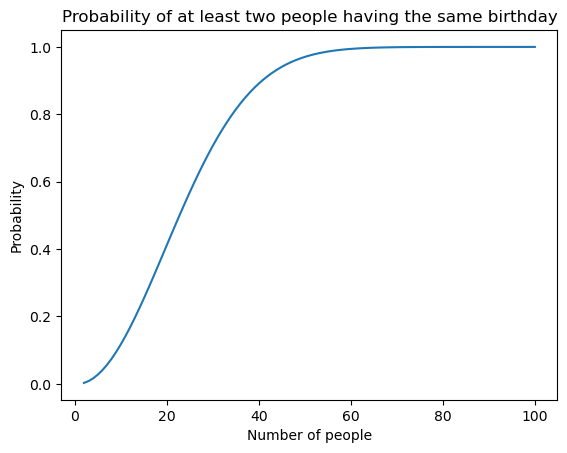

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns
from scipy.stats import norm

def calculate_probability(n):
    p = 1.0
    for i in range(1, n):
        p *= (365-i)/365
    return 1 - p

ns = np.arange(2, 101)
probabilities = np.array([calculate_probability(n) for n in ns])

plt.plot(ns, probabilities)
plt.xlabel('Number of people')
plt.ylabel('Probability')
plt.title('Probability of at least two people having the same birthday')
plt.show()

Calculating n for p=0.5 :

In [2]:
n = 2
for p in probabilities:
    if p>=0.5:
        print(n)
        break
    n += 1

23


Calculating n for p =0.99 :

In [3]:
n = 2
for p in probabilities:
    if p>=0.99:
        print(n)
        break
    n += 1

57


**1.2**
Using taylor serie for exponential to calculate probability :

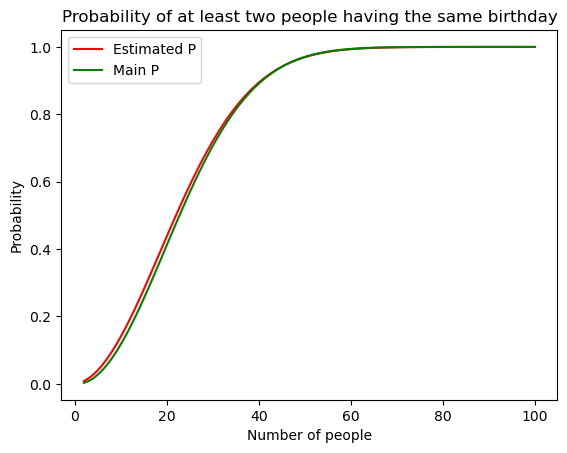

In [158]:
def calculate_probability(n):
    p = 1.0
    for i in range(1, n):
        p *= (365-i)/365
    return (1 - p)

def cal_with_exp(n):
    return (1 - np.exp(-(n*(n+1)) / 730))

ns = np.arange(2, 101)
main_probs = np.array([calculate_probability(n) for n in ns])
exp_probs  = np.array([cal_with_exp(n) for n in ns])

plt.plot(ns, exp_probs, color = 'r', label = 'Estimated P')
plt.plot(ns, main_probs, color = 'g', label = 'Main P')
plt.xlabel('Number of people')
plt.ylabel('Probability')
plt.title('Probability of at least two people having the same birthday')
plt.legend()
plt.show()

# Q2
**2.3**
Calculating expected value of number of tosses :

In [157]:
def play_game(p, n1, n2):
    budget = [n1, n2]
    rounds = 0
    while (min(budget) > 0) and (rounds<50):
        # flip a coin and determine the winner
        winner = random.choices([0, 1], weights=[p, 1-p])[0]
        loser = 1 - winner
        # the loser gives 1 dollar to the winner
        budget[loser] -= 1
        budget[winner] += 1
        rounds += 1
    return rounds

def simulate_game(p, n1, n2, num_trials):
    total_rounds = 0
    for i in range(num_trials):
        rounds = play_game(p, n1, n2)
        total_rounds += rounds
    avg_rounds = total_rounds / num_trials
    print(avg_rounds)

# example usage with p=0.45, n1=9, and n2=1
simulate_game(0.45, 9, 1, 100)

10.48


# Q3
**3.3**
Calculating Sn for a enclosed circle :

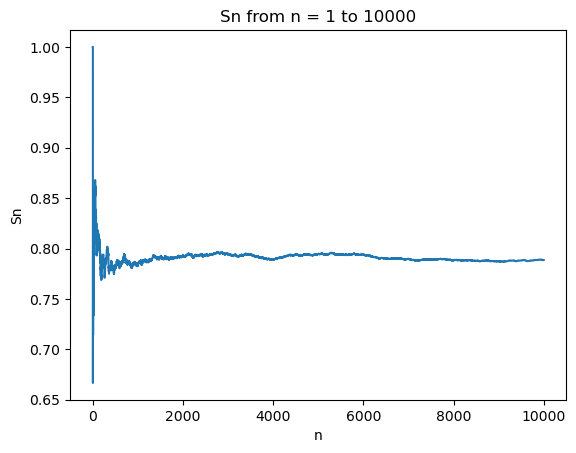

In [159]:
def is_subset(x, y):
    return(pow(x-0.5, 2) + pow(y-0.5, 2) <= 0.25)

def generate_point():
    return(random.uniform(0, 1))

def calculate_sn(xn, per_s, n):
    return((((n-1) * per_s) + xn)/n)

sn = np.zeros((10000), dtype=float)
sn[0] = is_subset(generate_point(), generate_point())
for i in range(1, 10000):
    xi = is_subset(generate_point(), generate_point())
    sn[i] = calculate_sn(xi, sn[i - 1], i+1)
ns = np.arange(1, 10001)

plt.plot(ns, sn)
plt.xlabel('n')
plt.ylabel('Sn')
plt.title('Sn from n = 1 to 10000')
plt.show()


**3.4**
Calculating E[Sn] for 0<= cos(pi * x) + sin(pi * y) <= 1 :

In [161]:
def is_subset2(x, y):
    sin = np.sin(np.pi * y)
    cos = np.cos(np.pi * x)
    return(0 <= cos + sin <= 1)

def generate_point():
    return(random.uniform(0, 1))

def calculate_sn(xn, per_s, n):
    return((((n-1) * per_s) + xn)/n)

sn = np.zeros((10000), dtype=float)
sn[0] = is_subset2(generate_point(), generate_point())
for i in range(1, 10000):
    xi = is_subset2(generate_point(), generate_point())
    sn[i] = calculate_sn(xi, sn[i - 1], i+1)

sum = 0
for element in sn:
    sum += element
expected_value = sum / 10000
print(expected_value)

0.3751088638944435


# Q4
**4.1**
Calculate and plotting 10000 t's for 2 Xi

d:\Anaconda\envs\Amar\lib\site-packages\ipykernel_launcher.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


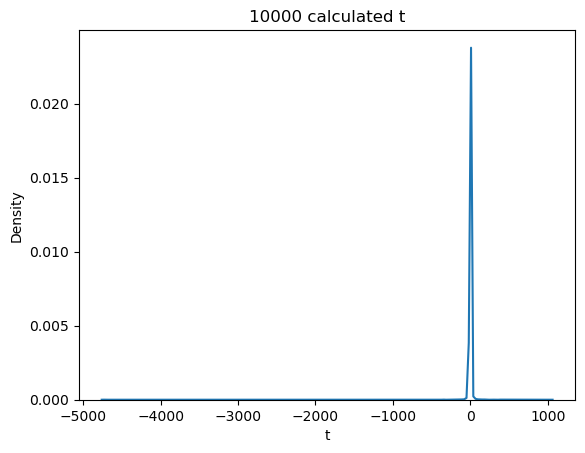

In [47]:
def calculate_t(samples, the_mu):
    n = len(samples)
    std = np.std(samples) * (n/(n-1))
    sample_mu = np.mean(samples)
    return (sample_mu - the_mu) / (std / np.sqrt(n))

def generate_all_t(num_of_repeat, num_of_samples):
    t = []
    for i in range(num_of_repeat):
        samples = np.random.normal(150, 10, num_of_samples)
        t.append(calculate_t(samples, 150))
    return t

t_list = generate_all_t(10000, 2)

sns.distplot(t_list, hist=False, kde=True, label = 't')

plt.xlabel('t')
plt.ylabel('Density')
plt.title('10000 calculated t')
plt.show()


**4.2**
Plotting standard normal with t to comparing

d:\Anaconda\envs\Amar\lib\site-packages\ipykernel_launcher.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


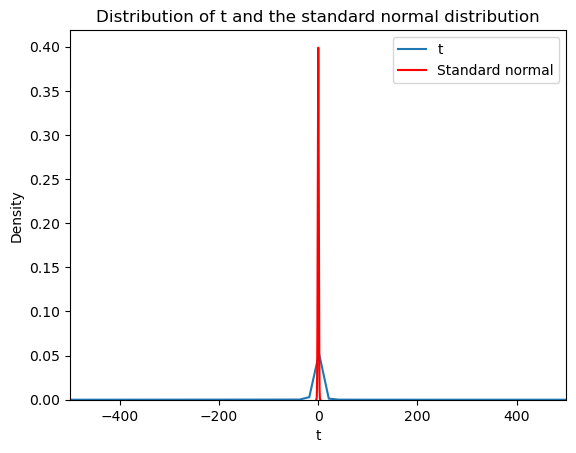

In [99]:
def calculate_t(samples, the_mu):
    n = len(samples)
    std = np.std(samples) * (n/(n-1))
    sample_mu = np.mean(samples)
    return (sample_mu - the_mu) / (std / np.sqrt(n))

def generate_all_t(num_of_repeat, num_of_samples):
    t = []
    for i in range(num_of_repeat):
        samples = np.random.normal(150, 10, num_of_samples)
        t.append(calculate_t(samples, 150))
    return t

t_list = generate_all_t(10000, 2)

sns.distplot(t_list, hist=False, kde=True, label = 't')

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)
plt.plot(x, y, 'r', label = 'Standard normal')

plt.xlabel('t')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of t and the standard normal distribution')
plt.xlim(-500, 500)
plt.show()

**4.3**
Plotting standard normal with t for 2, 3, 6, 100 Xi 

d:\Anaconda\envs\Amar\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
d:\Anaconda\envs\Amar\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys
d:\Anaconda\envs\Amar\lib\site-packages\ipykernel_launcher.py:8: UserW

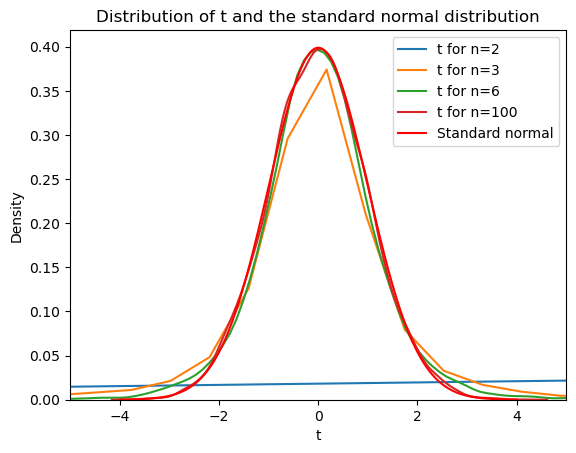

In [100]:
t_list2 = generate_all_t(10000, 2)
t_list3 = generate_all_t(10000, 3)
t_list6 = generate_all_t(10000, 6)
t_list100 = generate_all_t(10000, 100)

sns.distplot(t_list2, hist=False, kde=True, label='t for n=2')
sns.distplot(t_list3, hist=False, kde=True, label='t for n=3')
sns.distplot(t_list6, hist=False, kde=True, label='t for n=6')
sns.distplot(t_list100, hist=False, kde=True, label='t for n=100')

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)
plt.plot(x, y, 'r', label = 'Standard normal')

plt.xlabel('t')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of t and the standard normal distribution')
plt.xlim(-5, 5)
plt.show()




# Q5
## First part

**2**
Boxplot for temperature according to months :

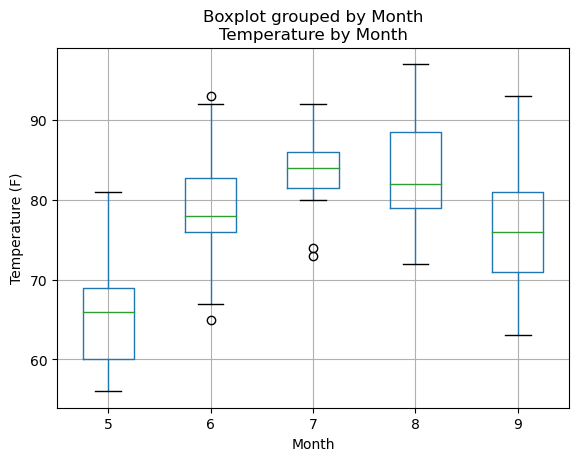

In [228]:
df = pd.read_csv('airquality.csv')

df.boxplot(column='Temp', by='Month')

plt.title('Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (F)')

plt.show()

**3**
Boxplot for expectedvalue of Ozone, Solar.R, Wind grouping by month :

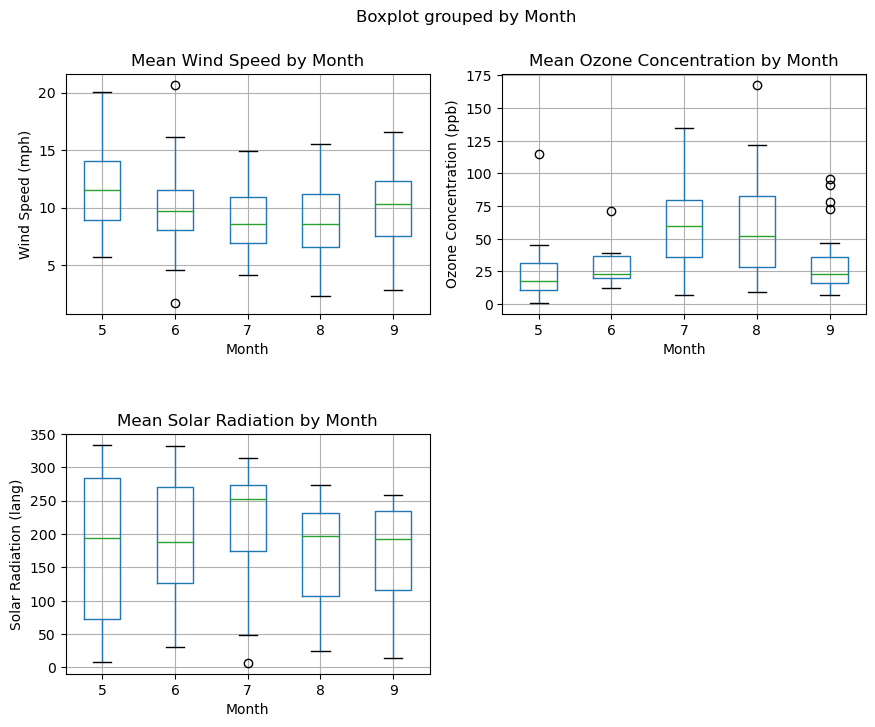

In [229]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

df.boxplot(column='Wind', by='Month', ax=axs[0, 0])
axs[0, 0].set_title('Mean Wind Speed by Month')
axs[0, 0].set_xlabel('Month')
axs[0, 0].set_ylabel('Wind Speed (mph)')

df.boxplot(column='Ozone', by='Month', ax=axs[0, 1])
axs[0, 1].set_title('Mean Ozone Concentration by Month')
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_ylabel('Ozone Concentration (ppb)')

df.boxplot(column='Solar.R', by='Month', ax=axs[1, 0])
axs[1, 0].set_title('Mean Solar Radiation by Month')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Solar Radiation (lang)')

axs[1, 1].axis('off')

fig.subplots_adjust(hspace=0.5)

plt.show()

**4**
Diagram for expected value of Ozon grouped by temperature :

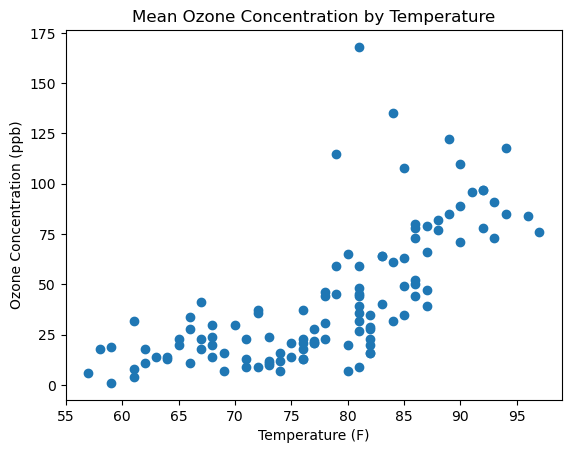

In [231]:
plt.scatter(df['Temp'], df['Ozone'])

plt.title('Mean Ozone Concentration by Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('Ozone Concentration (ppb)')

plt.show()

**5**
Plotting square root of Ozone by Month and Wind

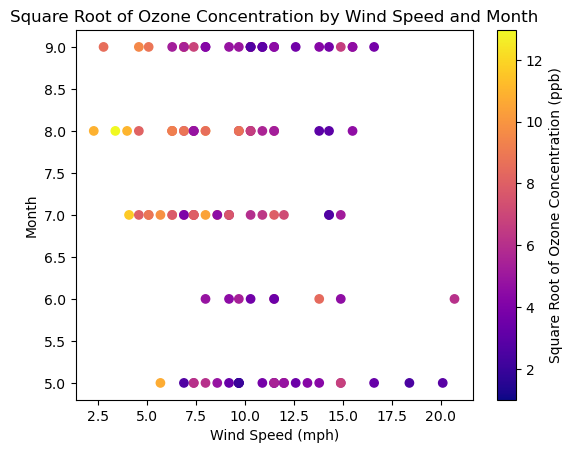

In [233]:
df['Ozone_sqrt'] = np.sqrt(df['Ozone'])

plt.scatter(df['Wind'], df['Month'], c=df['Ozone_sqrt'], cmap='plasma')

plt.title('Square Root of Ozone Concentration by Wind Speed and Month')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Month')
plt.colorbar(label='Square Root of Ozone Concentration (ppb)')

plt.show()

**6**
Histogram for Wind , Solar.R :

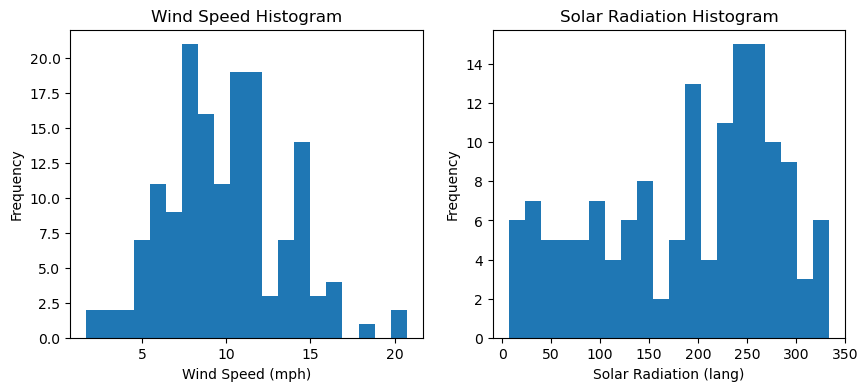

In [200]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].hist(df['Wind'], bins=20)
axs[0].set_title('Wind Speed Histogram')
axs[0].set_xlabel('Wind Speed (mph)')
axs[0].set_ylabel('Frequency')

axs[1].hist(df['Solar.R'], bins=20)
axs[1].set_title('Solar Radiation Histogram')
axs[1].set_xlabel('Solar Radiation (lang)')
axs[1].set_ylabel('Frequency')

plt.show()

## Second part
**1**
Plotting the speaker and microphones by time :

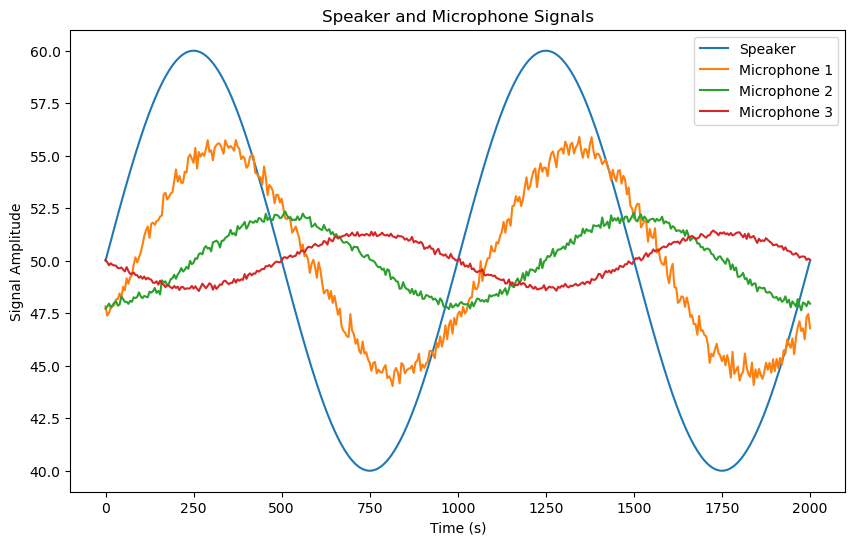

In [236]:
df2 = pd.read_csv('speaker.csv')

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df2['time'], df2['send'], label='Speaker')

ax.plot(df2['time'], df2['recieve1'], label='Microphone 1')
ax.plot(df2['time'], df2['receive2'], label='Microphone 2')
ax.plot(df2['time'], df2['receive3'], label='Microphone 3')

ax.set_title('Speaker and Microphone Signals')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal Amplitude')
ax.legend()

plt.show()

**2**
Normalizing the data and check their expected value and standard deviation 

In [237]:
speaker_mean = df2['send'].mean()
speaker_std = df2['send'].std()
df2['Speaker_normalized'] = (df2['send'] - speaker_mean) / speaker_std

mic1_mean = df2['recieve1'].mean()
mic1_std = df2['recieve1'].std()
df2['Microphone 1_normalized'] = (df2['recieve1'] - mic1_mean) / mic1_std

mic2_mean = df2['receive2'].mean()
mic2_std = df2['receive2'].std()
df2['Microphone 2_normalized'] = (df2['receive2'] - mic2_mean) / mic2_std

mic3_mean = df2['receive3'].mean()
mic3_std = df2['receive3'].std()
df2['Microphone 3_normalized'] = (df2['receive3'] - mic3_mean) / mic3_std

print('Speaker signal normalized mean:', round(df2['Speaker_normalized'].mean()))
print('Speaker signal normalized standard deviation:', round(df2['Speaker_normalized'].std()))
print('Microphone 1 signal normalized mean:', round(df2['Microphone 1_normalized'].mean()))
print('Microphone 1 signal normalized standard deviation:', round(df2['Microphone 1_normalized'].std()))
print('Microphone 2 signal normalized mean:', round(df2['Microphone 2_normalized'].mean()))
print('Microphone 2 signal normalized standard deviation:', round(df2['Microphone 2_normalized'].std()))
print('Microphone 3 signal normalized mean:', round(df2['Microphone 3_normalized'].mean()))
print('Microphone 3 signal normalized standard deviation:', round(df2['Microphone 3_normalized'].std()))

Speaker signal normalized mean: 0
Speaker signal normalized standard deviation: 1
Microphone 1 signal normalized mean: 0
Microphone 1 signal normalized standard deviation: 1
Microphone 2 signal normalized mean: 0
Microphone 2 signal normalized standard deviation: 1
Microphone 3 signal normalized mean: 0
Microphone 3 signal normalized standard deviation: 1


**3**
Plotting joint function between speaker and microphones

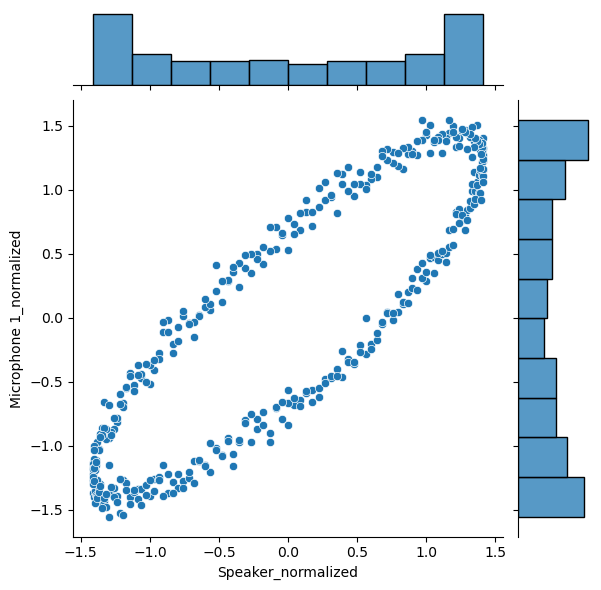

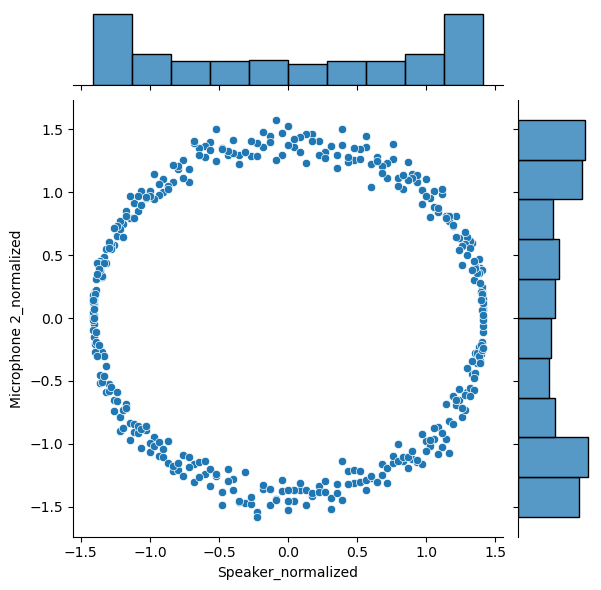

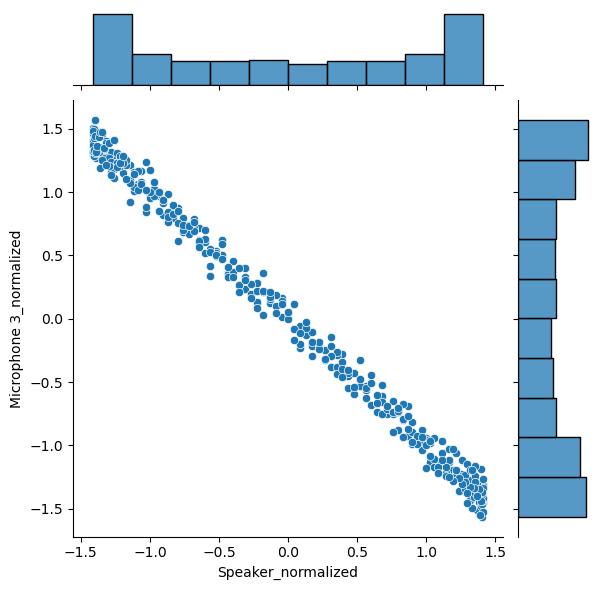

In [245]:
sns.jointplot(data=df2, x='Speaker_normalized', y='Microphone 1_normalized', kind='scatter')
sns.jointplot(data=df2, x='Speaker_normalized', y='Microphone 2_normalized', kind='scatter')
sns.jointplot(data=df2, x='Speaker_normalized', y='Microphone 3_normalized', kind='scatter')


**4**
Calculating covariance between speaker and microphones

In [249]:
cov1 = df2['Speaker_normalized'].cov(df2['Microphone 1_normalized'])
cov2 = df2['Speaker_normalized'].cov(df2['Microphone 2_normalized'])
cov3 = df2['Speaker_normalized'].cov(df2['Microphone 3_normalized'])

print('Covariance between Speaker and Microphone 1:', cov1)
print('Covariance between Speaker and Microphone 2:', cov2)
print('Covariance between Speaker and Microphone 3:', cov3)

Covariance between Speaker and Microphone 1: 0.8628302937797431
Covariance between Speaker and Microphone 2: -0.007245529889605529
Covariance between Speaker and Microphone 3: -0.9967574051703081
